IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Proyecto de Investigación – Terremotos en Chile


## Pregunta 2:
## **-Calcular los mayores terremotos por región**<br> 

In [20]:
import pandas as pd
import geopandas as gpd
from os import chdir, getcwd
import matplotlib.pyplot as plt
if 'Preguntas'in getcwd():
    chdir('../')

In [31]:
terremotos = pd.read_csv('data//query_limpio.csv', index_col=0)
terremotos = terremotos[["latitude", "longitude", "mag", "magType", 'date', "zone", "region"]] #Filtramos las regiones que trabajaremos para esta pregunta
terremotos.head()


,latitude,longitude,mag,magType,date,zone,region
0,-30.6105,-71.2446,4.6,mb,2025-09-01,Ovalle,Coquimbo
1,-18.9492,-69.4232,4.6,mb,2025-08-29,Camiña,Tarapacá
2,-21.7142,-68.4897,4.7,mb,2025-08-25,Ollagüe,Antofagasta
3,-19.3888,-69.2674,5.0,mb,2025-08-24,Camiña,Tarapacá
4,-32.5045,-71.5221,4.7,mb,2025-08-23,La Ligua,Valparaíso


Ordenamos el DataFrame de modo que los terremotos de mayor magnitud se encuentren en la parte superior.

In [32]:
terremotos = terremotos.sort_values(by='mag',ascending=False)
terremotos

,latitude,longitude,mag,magType,date,zone,region
8810,-38.1430,-73.4070,9.5,mw,1960-05-22,Valdivia,Los Ríos
4424,-36.1220,-72.8980,8.8,mww,2010-02-27,Maule,Maule
8946,-28.2930,-69.8520,8.5,mw,1922-11-11,Vallenar,Atacama
1947,-31.5729,-71.6744,8.3,mww,2015-09-16,Illapel,Coquimbo
8974,-32.4000,-71.4000,8.2,mw,1906-08-17,Valparaíso,Valparaíso
...,...,...,...,...,...,...,...
7157,-27.2890,-71.4050,4.5,ms,1987-05-03,Copiapó,Atacama
7160,-33.9450,-72.3500,4.5,mb,1987-04-24,San Antonio,Valparaíso
7172,-22.7950,-68.7920,4.5,mb,1987-03-21,Calama,Antofagasta
7179,-24.1620,-70.7740,4.5,mb,1987-03-08,Antofagasta,Antofagasta


Luego creamos un set que contenga todas la regiones contenidas en nuestro dataframe para poder extraer los datos de cada una, además por temas de comodidad, eliminamos Coquimbo del set y creamos un dataframe con la información de su terremoto de mayor magnitud; para facilitar la creación del dataframe que contenga exclusivamente el mayor terremoto de de cada región.

In [33]:
regiones = set(terremotos['region'])
regiones.remove('Coquimbo')
mayores_sismos = terremotos[terremotos['region'] == 'Coquimbo'].head(1)
mayores_sismos

,latitude,longitude,mag,magType,date,zone,region
1947,-31.5729,-71.6744,8.3,mww,2015-09-16,Illapel,Coquimbo


In [34]:
for region in regiones:
    otro1 = (terremotos[terremotos['region'] == region].head(1))
    mayores_sismos = mayores_sismos.merge(otro1, how='outer')
mayores_sismos

,latitude,longitude,mag,magType,date,zone,region
0,-53.9960,-70.0570,7.58,mw,1949-12-17,Punta Arenas,Magallanes
1,-46.7807,-75.6402,6.30,mww,2024-11-08,Cochrane,Aysén
2,-43.4064,-73.9413,7.60,mww,2016-12-25,Quellón,Los Lagos
3,-38.1430,-73.4070,9.50,mw,1960-05-22,Valdivia,Los Ríos
4,-38.0610,-73.0390,7.80,mw,1960-05-22,Traiguén,Araucanía
5,-37.8240,-73.3530,8.10,mw,1960-05-21,Cañete,Biobío
6,-36.2960,-72.2130,7.85,mw,1939-01-25,San Carlos,Ñuble
7,-36.1220,-72.8980,8.80,mww,2010-02-27,Maule,Maule
8,-34.3260,-71.7990,7.00,mwc,2010-03-11,Santa Cruz,Libertador General Bernardo O'Higgins
9,-33.8320,-69.9580,6.81,mw,1958-09-04,Puente Alto,Región Metropolitana


In [36]:
mayores_sismos.describe()

,latitude,longitude,mag
count,16.000000,16.000000,16.000000
mean,-34.564044,-71.892875,7.858750
std,9.276644,1.714732,0.789336
min,-53.996000,-75.640200,6.300000
25%,-38.081500,-73.117500,7.485000
50%,-35.224000,-71.736700,7.925000
75%,-30.752925,-70.234750,8.225000
max,-19.022000,-69.852000,9.500000


Vemos que los valores están en el rango razonable y nada fuera de lo común. También podemos observar que no posee datos nulos y podemos trabajar con ellos.

In [37]:
mayores_sismos = mayores_sismos.dropna()
mayores_sismos = mayores_sismos.drop_duplicates(keep='first')
print("Cantidad total de nulos en df:", mayores_sismos.isnull().sum().sum())
print("Cantidad total de duplicados en df:", mayores_sismos.duplicated().sum())

Cantidad total de nulos en df: 0
Cantidad total de duplicados en df: 0


Podemos visualizar las diferencias de los mayores terremotos por región en el siguiente gráfico

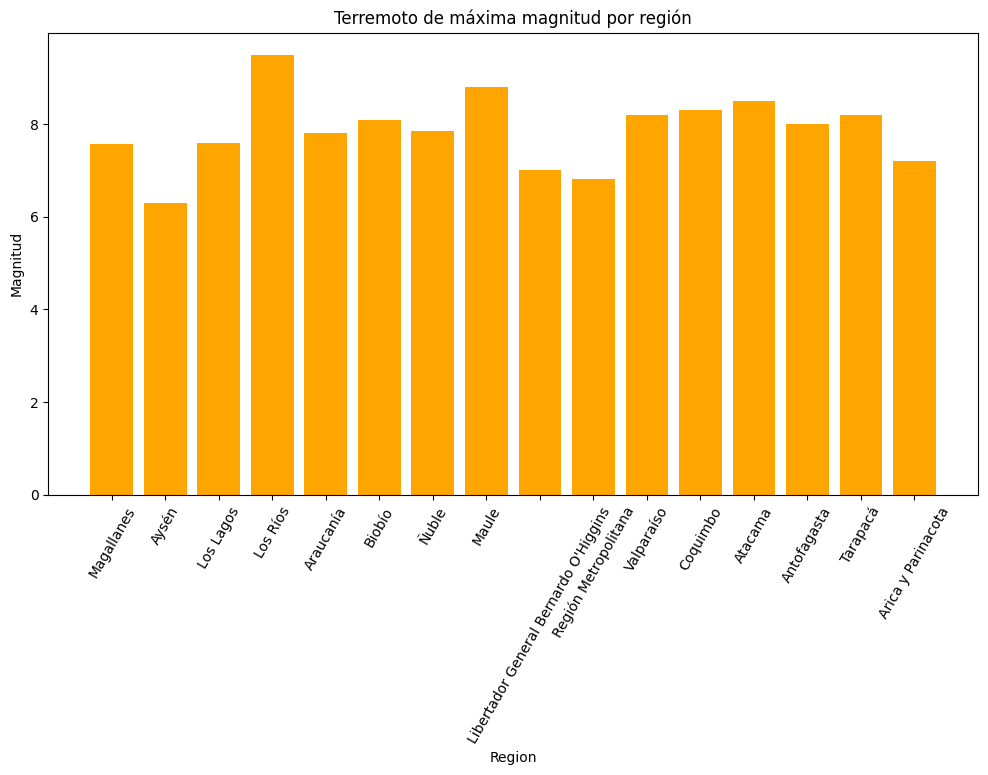

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(mayores_sismos['region'], mayores_sismos['mag'], color = "orange")
plt.title('Terremoto de máxima magnitud por región')
plt.xlabel('Region')
plt.ylabel('Magnitud')
plt.xticks(rotation=60)
plt.show()

A continuación veremos un mapa con la ubicación de los terremotos

In [21]:
gdf = gpd.GeoDataFrame(
    mayores_sismos, geometry=gpd.points_from_xy(mayores_sismos["longitude"], mayores_sismos
    ["latitude"]), crs="EPSG:4326")

direccion = "data//Regiones//Regional.shp"
regional = gpd.read_file(direccion)
regional_corrected = regional.set_crs("EPSG:3857", allow_override=True)
regional_wgs84 = regional_corrected.to_crs("EPSG:4326")

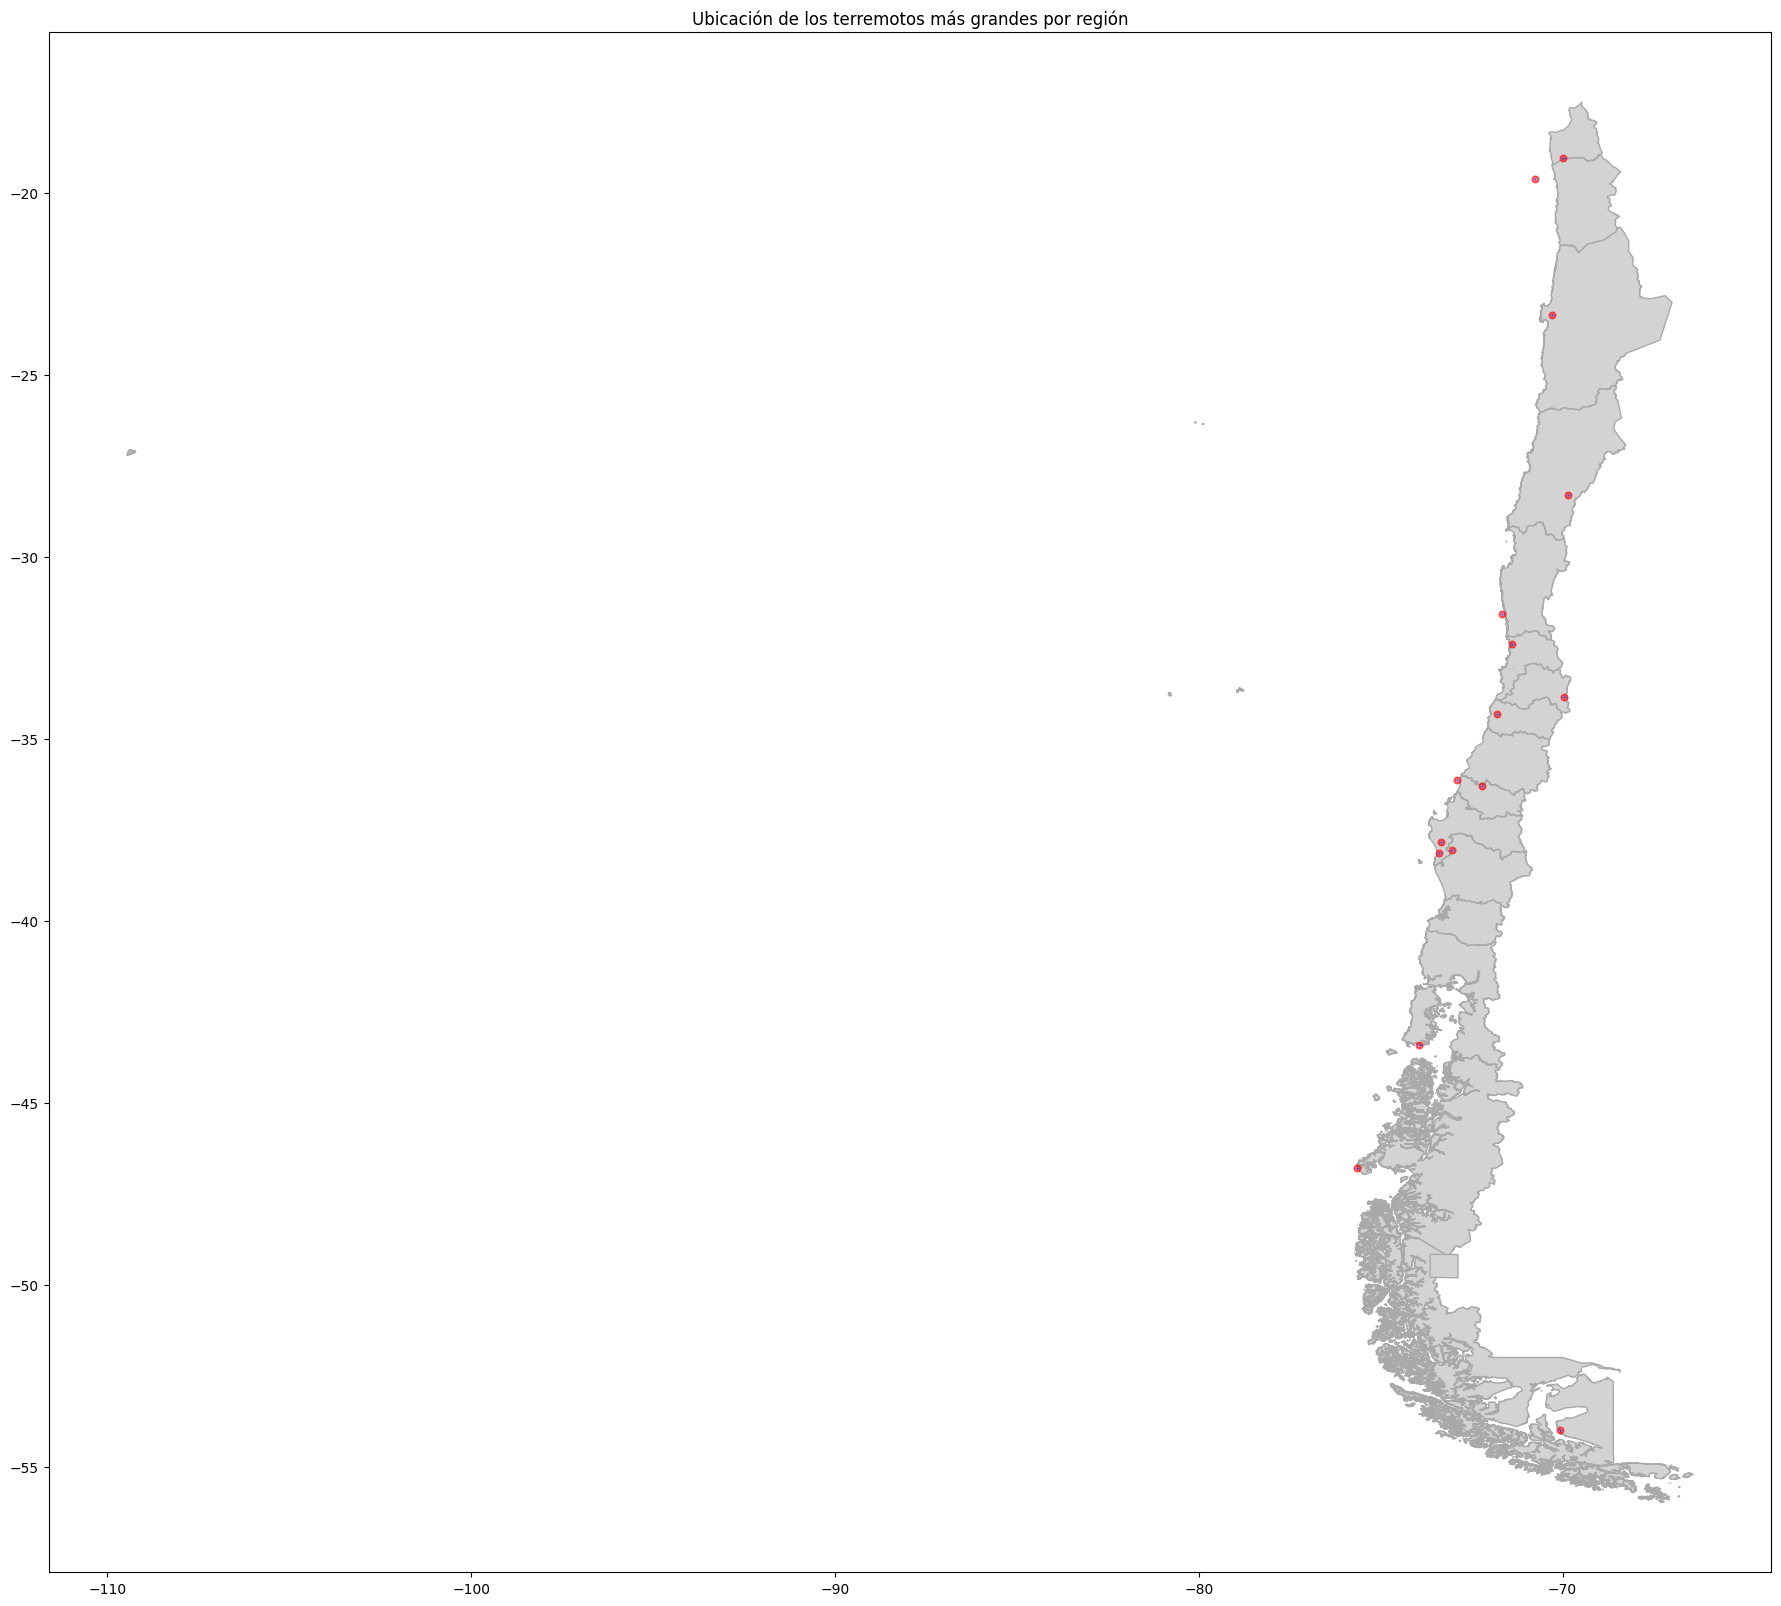

In [29]:
fig, ax = plt.subplots(figsize=(30, 20))
regional_wgs84.plot(ax=ax, color='lightgray', edgecolor="darkgray")
gdf.plot(ax=ax, color='blue', markersize=3, alpha=0.7, edgecolor='red', lw=4)
ax.set_aspect('equal')
ax.set_title('Ubicación de los terremotos más grandes por región')
plt.show()